# Preamble

In [1]:
import os, sys, glob
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import scipy.io as sio
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_DWI/code/func/')
from proj_environment import set_proj_env
from func import mark_outliers, winsorize_outliers_signed

In [3]:
train_test_str = 'squeakycleanExclude'
exclude_str = 't1Exclude' # 't1Exclude' 'fsFinalExclude'
parc_str = 'schaefer' # 'schaefer' 'lausanne'
parc_scale = 400 # 200 400 | 60 125
extra_str = ''
# extra_str = '_nuis-netdens'
# extra_str = '_nuis-str'
parcel_names, parcel_loc, drop_parcels, num_parcels, yeo_idx, yeo_labels = set_proj_env(train_test_str = train_test_str, exclude_str = exclude_str,
                                                                            parc_str = parc_str, parc_scale = parc_scale, extra_str = extra_str)

### Setup output directory

In [4]:
print(os.environ['MODELDIR_BASE'])
print(os.environ['MODELDIR'])
if not os.path.exists(os.environ['MODELDIR']): os.makedirs(os.environ['MODELDIR'])

/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_DWI/analysis/normative/t1Exclude/squeakycleanExclude/schaefer_400_streamlineCount
/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_DWI/analysis/normative/t1Exclude/squeakycleanExclude/schaefer_400_streamlineCount


### Data processing options

In [5]:
wins_data = True
my_thresh = 3
norm_data = True

## Load data

In [6]:
# Load data
df = pd.read_csv(os.path.join(os.environ['MODELDIR_BASE'], 'df_pheno.csv'))
df.set_index(['bblid', 'scanid'], inplace = True)
print(df.shape)

(1100, 20)


In [7]:
# Load data
df_node = pd.read_csv(os.path.join(os.environ['MODELDIR_BASE'], 'df_node_base.csv'))
df_node.set_index(['bblid', 'scanid'], inplace = True)
print(df_node.shape)

(1100, 1201)


In [8]:
df_node.head()

,,squeakycleanExclude,str_0,str_1,str_2,str_3,str_4,str_5,str_6,str_7,str_8,...,mc_390,mc_391,mc_392,mc_393,mc_394,mc_395,mc_396,mc_397,mc_398,mc_399
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
81287,2738,0,1026.0,1898.0,2021.0,1508.0,1762.0,1099.0,1845.0,1317.0,1508.0,...,0.968570,0.954994,0.987192,0.976455,0.994941,0.992331,0.996962,0.987588,0.989885,0.997620
80680,2739,1,502.0,1988.0,534.0,671.0,366.0,166.0,737.0,546.0,976.0,...,0.967916,0.919031,0.995182,0.964410,0.986566,0.982010,0.993621,0.953884,0.986840,0.989380
81754,2740,1,1086.0,2143.0,1778.0,2324.0,1442.0,952.0,1120.0,2858.0,1654.0,...,0.972310,0.993218,0.998226,0.995700,0.998244,0.998225,0.999274,0.990514,0.996410,0.994127
81903,2749,0,342.0,1707.0,2520.0,2560.0,310.0,426.0,563.0,432.0,1118.0,...,0.951660,0.962255,0.996996,0.985469,0.994995,0.991197,0.999216,0.994302,0.997137,0.989855
81043,2750,0,812.0,1890.0,467.0,910.0,1797.0,1844.0,2754.0,1095.0,2359.0,...,0.891219,0.975395,0.991177,0.930168,0.992194,0.981106,0.995268,0.992437,0.988617,0.991444


### Compute whole brain averages

In [9]:
metrics = ('str', 'ac', 'mc')
df_node_mean = pd.DataFrame(index = df_node.index, columns = metrics)
for metric in metrics:
    df_node_mean[metric] = df_node.filter(regex = metric, axis = 1).mean(axis = 1)

# Plots

In [10]:
# Labels
sns.set(style='white', context = 'talk', font_scale = .8)

/Users/lindenmp/.virtualenvs/NeuroDev_NetworkControl/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


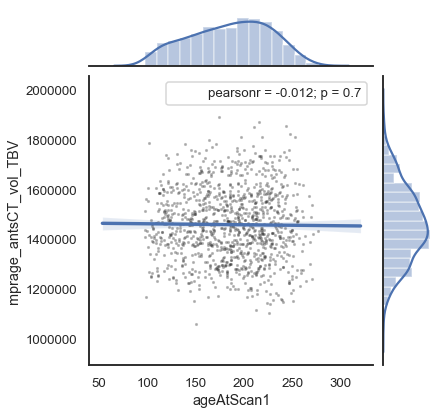

In [11]:
metric_x = 'ageAtScan1'
metric_y = 'mprage_antsCT_vol_TBV'
f = sns.jointplot(x = df[metric_x], y = df[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

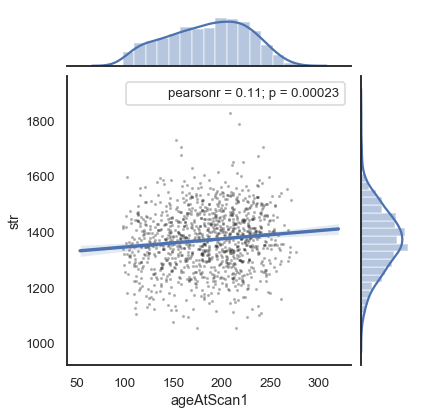

In [12]:
metric_x = 'ageAtScan1'
metric_y = 'str'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [13]:
metric_x = 'mprage_antsCT_vol_TBV'
# metric_x = 'network_density'
# metric_x = 'streamline_count'

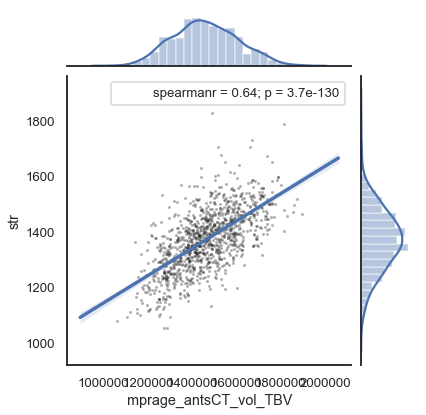

In [14]:
metric_y = 'str'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.spearmanr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

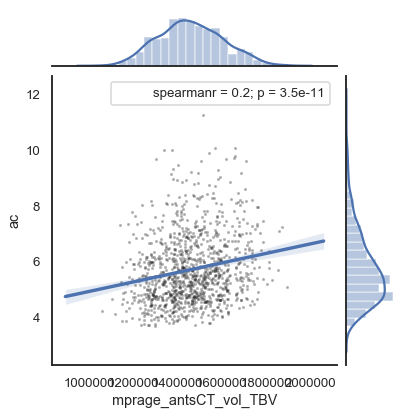

In [15]:
metric_y = 'ac'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.spearmanr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

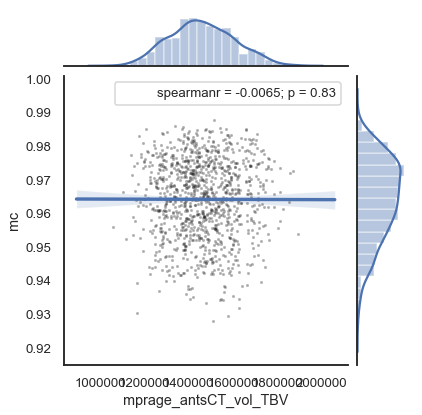

In [16]:
metric_y = 'mc'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.spearmanr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [17]:
for metric in metrics:
    x = df_node.filter(regex = metric, axis = 1).mean(axis = 1)
    outliers = mark_outliers(x, thresh = my_thresh)
    print(metric + ': ' + str(np.round((outliers.sum() / x.shape[0]) * 100,2)))

str: 17.55
ac: 17.55
mc: 13.09


A higher threshold than 3 probably makes sense but sticking with convention to avoid 'kick me' signs with reviewers.

Note, results are unaffected by setting my_thresh to 4,5, or 6

### Check frequency of outliers

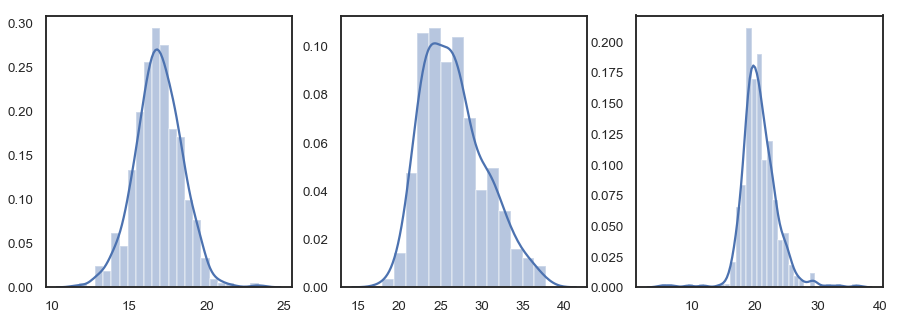

In [18]:
df_node_mask = pd.DataFrame(index = df_node.index, columns = df_node.columns)
for i, col in enumerate(df_node.columns):
    x = df_node.loc[:,col].copy()
    x_out = mark_outliers(x, thresh = my_thresh)
    df_node_mask.loc[:,col] = x_out

f, axes = plt.subplots(1,len(metrics))
f.set_figwidth(len(metrics)*5)
f.set_figheight(5)

for i, metric in enumerate(metrics):
    if df_node_mask.filter(regex = metric).sum().any():
        sns.distplot(df_node_mask.filter(regex = metric).sum()/df_node_mask.filter(regex = metric).shape[0]*100, ax = axes[i])

### Winsorize outliers

In [19]:
if wins_data:
    for i, col in enumerate(df_node.columns):
        x = df_node.loc[:,col].copy()
        x_out = winsorize_outliers_signed(x, thresh = my_thresh)
        df_node.loc[:,col] = x_out
else:
    print('Skipping...')

## Normalize

In [20]:
if np.any(df_node<0):
    print('WARNING: some regional values are <0.. box cox will fail')

In [21]:
rank_r = np.zeros(df_node.filter(regex = 'ac|mc').shape[1])

In [22]:
# normalise
if norm_data:
    for i, col in enumerate(df_node.filter(regex = 'ac|mc').columns):
        # normalize regional metric
        x = sp.stats.boxcox(df_node.loc[:,col])[0]
        # check if rank order is preserved
        rank_r[i] = sp.stats.spearmanr(df_node.loc[:,col],x)[0]
        # store normalized version
        df_node.loc[:,col] = x
else:
    print('Skipping...')

In [23]:
np.sum(rank_r < .99)

0

### Check distributions

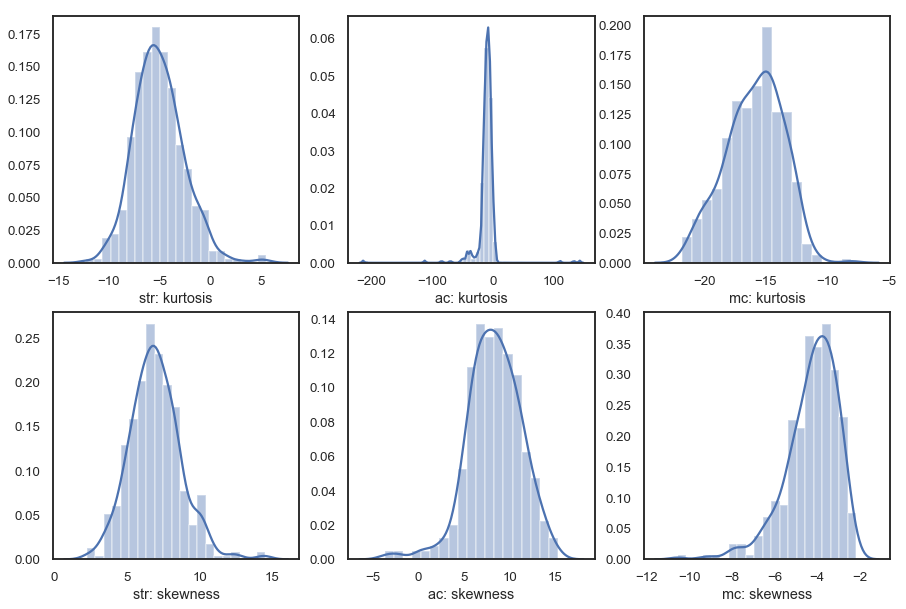

In [24]:
f, axes = plt.subplots(2,len(metrics))
f.set_figwidth(len(metrics)*5)
f.set_figheight(10)

for i, metric in enumerate(metrics):
    kur = np.zeros((df_node.filter(regex = metric).shape[1]))
    skew = np.zeros((df_node.filter(regex = metric).shape[1]))
    for j, node in enumerate(df_node.filter(regex = metric).columns):
        d = sp.stats.zscore(df_node.filter(regex = metric).loc[:,node])
        kur[j] = sp.stats.kurtosistest(d)[0]
        skew[j] = sp.stats.skewtest(d)[0]
    
    sns.distplot(kur, ax = axes[0,i])
    axes[0,i].set_xlabel(metric+': kurtosis')
    sns.distplot(skew, ax = axes[1,i])
    axes[1,i].set_xlabel(metric+': skewness')

In [25]:
my_str = os.environ['MODELDIR'].split('/')[-1]
my_str = my_str.split('_')[-1]
my_str

'streamlineCount'

In [26]:
if my_str == 'nuis-streamline' or my_str == 'nuis-netdens':
    df_node = df_node.filter(regex = 'squeakycleanExclude|str|ac|mc', axis = 1)
elif my_str == 'nuis-str':
    df_str = df_node.filter(regex = 'str', axis = 1).copy()
    df_node = df_node.filter(regex = 'squeakycleanExclude|ac|mc', axis = 1)
else:
    print('skipping...')

skipping...


In [27]:
df_node.shape

(1100, 1201)

## Nuisance regression

In [28]:
df_node_bak = df_node.copy()

In [29]:
if my_str == 'nuis-str':
    print('Running strength nuisance regression')
    for col in df_node.filter(regex = 'ac|mc', axis = 1).columns:
        nuis = ['mprage_antsCT_vol_TBV', 'dti64MeanRelRMS']
        df_nuis = df[nuis]
        df_nuis = sm.add_constant(df_nuis)

        col_nuis = 'str_' + col.split('_')[1]
        df_nuis.loc[:,'str'] = df_str.loc[:,col_nuis]

        mdl = sm.OLS(df_node.loc[:,col], df_nuis).fit()
        y_pred = mdl.predict(df_nuis)
        df_node.loc[:,col] = df_node.loc[:,col] - y_pred
else:
    if my_str == 'nuis-netdens':
        print('Running network density nuisance regression')
        nuis = ['mprage_antsCT_vol_TBV', 'dti64MeanRelRMS', 'network_density']
        df_nuis = df[nuis]
    else:
        print('Running standard nuisance regression')
        nuis = ['mprage_antsCT_vol_TBV', 'dti64MeanRelRMS']
        df_nuis = df[nuis]
    print(nuis)
    df_nuis = sm.add_constant(df_nuis)

    my_str = '|'.join(metrics); print(my_str)
    cols = df_node.filter(regex = my_str, axis = 1).columns

    mdl = sm.OLS(df_node.loc[:,cols], df_nuis).fit()
    y_pred = mdl.predict(df_nuis)
    y_pred.columns = cols
    df_node.loc[:,cols] = df_node.loc[:,cols] - y_pred

Running standard nuisance regression
['mprage_antsCT_vol_TBV', 'dti64MeanRelRMS']
str|ac|mc


/Users/lindenmp/.virtualenvs/NeuroDev_NetworkControl/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


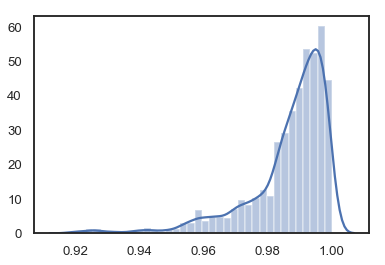

In [30]:
r = np.zeros(df_node.shape[1])
for i, col in enumerate(df_node.columns):
    r[i] = sp.stats.spearmanr(df_node_bak[col],df_node[col])[0]
sns.distplot(r)

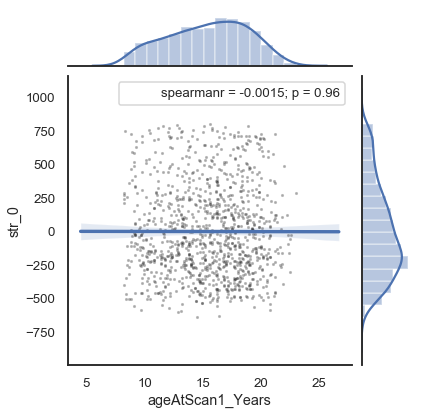

In [31]:
f = sns.jointplot(x = df['ageAtScan1_Years'], y = df_node['str_0'], kind="reg")
f.annotate(sp.stats.spearmanr)
# f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

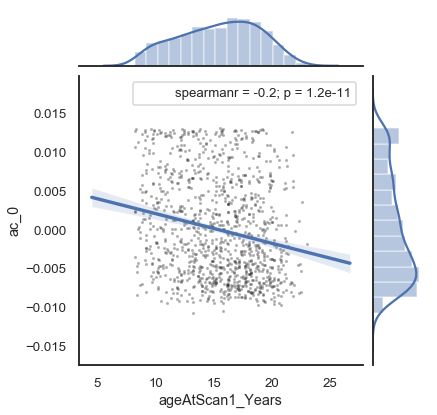

In [32]:
f = sns.jointplot(x = df['ageAtScan1_Years'], y = df_node['ac_0'], kind="reg")
f.annotate(sp.stats.spearmanr)
# f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

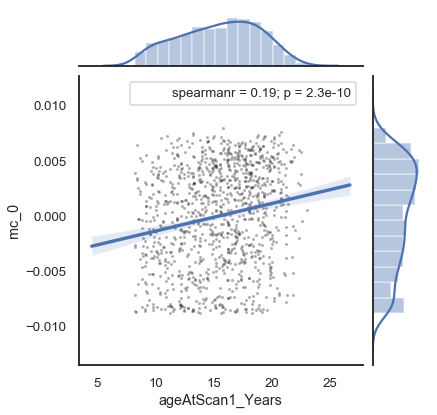

In [33]:
f = sns.jointplot(x = df['ageAtScan1_Years'], y = df_node['mc_0'], kind="reg")
f.annotate(sp.stats.spearmanr)
# f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [34]:
df_node.isna().any().any()

False

## Save out

In [35]:
# Save out
df_node.to_csv(os.path.join(os.environ['MODELDIR'], 'df_node_clean.csv'))
# df_node.to_csv(os.path.join(os.environ['MODELDIR'], 'df_node_clean_my_thresh-'+str(my_thresh)+'.csv'))